# Machine Learning Models

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/transformed_data_wop.csv', index_col=0)

## Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
data.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,neutralized,Mix
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Male,1.000000,Shetland Sheepdog,Brown/White,2014,2,True,True
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Female,1.000000,Domestic Shorthair,Cream Tabby,2013,10,True,True
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Male,2.000000,Pit Bull,Blue/White,2015,1,True,True
A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Male,0.057692,Domestic Shorthair,Blue Cream,2014,7,False,True
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Male,2.000000,Lhasa Apso,Tan,2013,11,True,False


In [5]:
data.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [6]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["AgeuponOutcome"] = data_ml["AgeuponOutcome"].astype(int)
data_ml.head()

<ipython-input-6-53cbf7356c66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["AgeuponOutcome"] = data_ml["AgeuponOutcome"].astype(int)


,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,neutralized,Mix
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Male,1,Shetland Sheepdog,Brown/White,2014,2,True,True
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Female,1,Domestic Shorthair,Cream Tabby,2013,10,True,True
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Male,2,Pit Bull,Blue/White,2015,1,True,True
A677334,Elsa,2014-04-25 13:04:00,Transfer,Dog,Female,0,Cairn Terrier,Black/Tan,2014,4,False,False
A699218,Jimmy,2015-03-28 13:11:00,Transfer,Cat,Male,0,Domestic Shorthair,Blue Tabby,2015,3,False,True


In [7]:
y = (data_ml["OutcomeType"] == "Adoption").astype(np.int) # if adopted then 1 else 0
x = data_ml["AgeuponOutcome"] # just using only age as a test predictor for now
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42) # splitting in training & test data

In [8]:
log_reg = LogisticRegression()
log_reg.fit(x_train[:,np.newaxis], y_train)

<ipython-input-8-388e1aab2249>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_reg.fit(x_train[:,np.newaxis], y_train)


LogisticRegression()

In [9]:
pred = log_reg.predict(x_test[:,np.newaxis])

<ipython-input-9-fca1e734938d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = log_reg.predict(x_test[:,np.newaxis])


In [10]:
print(classification_report(y_test, pred)) #accuracy only 64% for now but there are still some predictors to add

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3263
           1       0.61      0.66      0.63      3007

    accuracy                           0.63      6270
   macro avg       0.64      0.64      0.63      6270
weighted avg       0.64      0.63      0.63      6270



<ipython-input-16-be46ab084691>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = log_reg.score(x_test[:,np.newaxis], y_test)


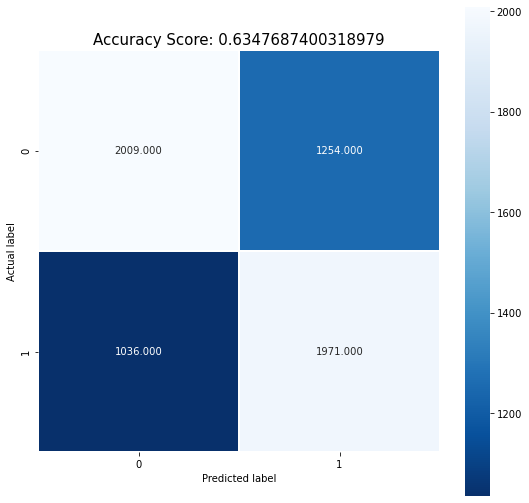

In [16]:
cm = confusion_matrix(y_test, pred)
score = log_reg.score(x_test[:,np.newaxis], y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15); # creating confusion matrix as a performance measure and also for further use for a ROC-curve